                                    Лабораторна робота №1. Системи Data Science
                                        КМ-83, Мишура Дмитро Олександрович.
                   Розуміння бізнесу - розуміння даних. Підготовка даних для вирішення коркретної задачі

Завдання.
1.1 Розуміння бізнесу - розуміння даних:
    - Предметна область для досліджень - інформація про фільми з сайту IMDb. 
    - Постановка задачі - змоделювати залежність рейтингу фільму від жанру або жанрів цього фільму(наприклад екшн-комедія,
      наукова фантастика-детектив) та визначити хто з режисерів краще знімає фільми тих чи інших жанрів.
    - збір даних - дані були завантажені з сайту kaggle.com
      посилання - 
    - дані зберігаються в форматі .csv. В самій програмі дані зберігаються у вигляді датафрейму(pandas.DataFrame()). Файл 
      містить 1000 рядків та 12 стовбців
1.2 Підготовка даних:
    - Первинна очистка даних - NaN та NULL значення були усунені на попередньому етапі, значень дублікатів немає і 
      objects також.
    - Розвідувальний аналіз даних

In [52]:
import csv
import pandas
import seaborn
import numpy
from matplotlib import pyplot as plt



data_arr = []
list0 = []
list1 = []
list2 = []
list3 = []
list4 = []
list5 = []
list6 = []

        
with open ('IMDB-Movie-Data.csv', mode='r', encoding="utf-8") as csv_file:
    csv_reader = csv.DictReader(csv_file)
    i = 0
    for row in csv_reader:
        try:
            a = float(row['Rating'])
            a = float(row['Revenue (Millions)'])
            a = float(row['Metascore'])
            for el in row['Genre'].split(','):
                list0.append(i)
                list1.append(el)
                list2.append(row['Director'])
                list3.append(float(row['Rating']))
                list4.append(float(row['Revenue (Millions)']))
                list5.append(float(row['Metascore']))
            i = i + 1
        except Exception:
            None
        
df = pandas.DataFrame({'Id':list0 ,'Genre':list1, 'Director':list2, 'Rating':list3, 'Revenue':list4, 'Metascore':list5})
df

,Id,Genre,Director,Rating,Revenue,Metascore
0,0,Action,James Gunn,8.1,333.13,76.0
1,0,Adventure,James Gunn,8.1,333.13,76.0
2,0,Sci-Fi,James Gunn,8.1,333.13,76.0
3,1,Adventure,Ridley Scott,7.0,126.46,65.0
4,1,Mystery,Ridley Scott,7.0,126.46,65.0
...,...,...,...,...,...,...
2185,836,Music,Jon M. Chu,6.2,58.01,50.0
2186,836,Romance,Jon M. Chu,6.2,58.01,50.0
2187,837,Comedy,Barry Sonnenfeld,5.3,19.64,11.0
2188,837,Family,Barry Sonnenfeld,5.3,19.64,11.0


1.2 Підготовка даних:
    - Первинна очистка даних - NaN та NULL значення були усунені на попередньому етапі, значень дублікатів немає і 
      objects також.
    - Розвідувальний аналіз даних

In [35]:
df1 = df.drop_duplicates(subset=['Genre'])
df1
df2 = df.drop_duplicates(subset=['Director'])

<AxesSubplot:>

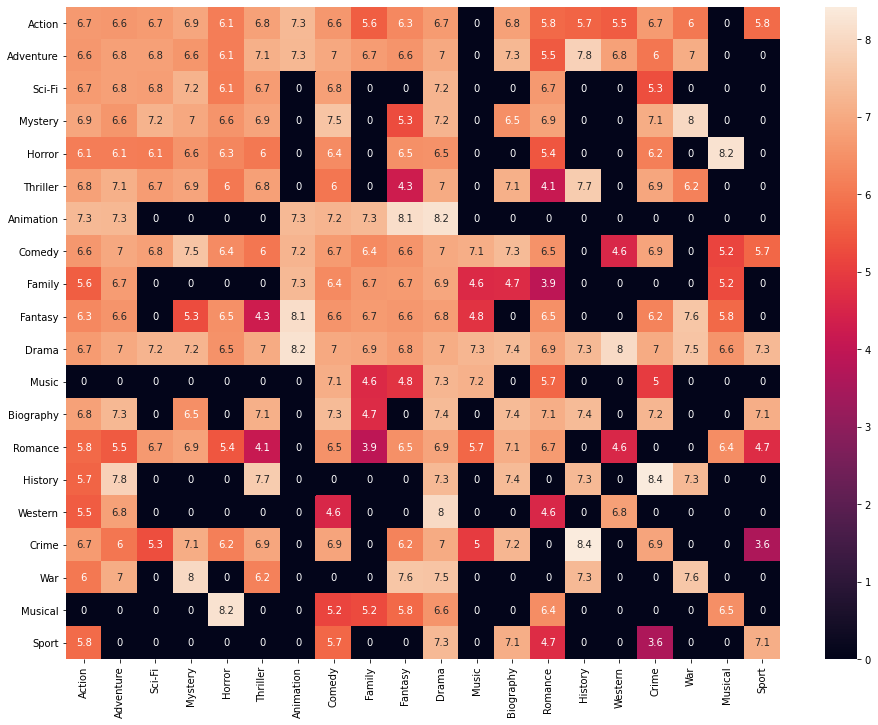

In [36]:
genres_list = []
for index, el in df1.iterrows():
    #print(el['Genre'])
    genres_list.append(el['Genre'])
film_rating_list =  numpy.empty([len(genres_list), len(genres_list), 3])
film_rating_list2 =  numpy.empty([len(genres_list), len(genres_list)])
for el1 in film_rating_list:
    for el2 in el1:
        el2[0] = 0
        el2[1] = 0
        el2[2] = 0
k = 0
while k < i:
    temp_df = df.loc[df['Id']==k]
    temp_list = []
    for index, el in temp_df.iterrows():
        temp_list.append(el['Genre'])
    a = 0
    while a < len(temp_list):
        b = 0
        while b < len(temp_list):
            ind1 = genres_list.index(temp_list[a])
            ind2 = genres_list.index(temp_list[b])
            film_rating_list[ind1][ind2][0] = film_rating_list[ind1][ind2][0] + el['Rating']
            film_rating_list[ind1][ind2][1] = film_rating_list[ind1][ind2][1] + el['Metascore']/10
            film_rating_list[ind1][ind2][2] = film_rating_list[ind1][ind2][2] + 1
            b = b + 1
        a = a + 1
    k = k + 1
a = 0
while a < len(genres_list):
    b = 0
    while b < len(genres_list):
        if film_rating_list[a][b][0] !=0 and film_rating_list[a][b][2]>=10:
            film_rating_list2[a][b] = film_rating_list[a][b][0]/film_rating_list[a][b][2]
        elif film_rating_list[a][b][0] !=0 and film_rating_list[a][b][2]<10:
            film_rating_list2[a][b] = (film_rating_list[a][b][0]+(film_rating_list[a][b][1]/film_rating_list[a][b][2]*(10-film_rating_list[a][b][2])))/10
        else:
            film_rating_list2[a][b] = 0
        b = b + 1
    a = a + 1

ax = plt.subplots(figsize=(16,12))
ax = seaborn.heatmap(film_rating_list2, annot = True, xticklabels=genres_list, yticklabels=genres_list)
ax

In [51]:
genres_list = []
directors_list = []
for index, el in df1.iterrows():
    genres_list.append(el['Genre'])
for index, el in df1.iterrows():
    directors_list.append(el['Director'])  
directors_genres_list = numpy.empty([len(directors_list), 2])
directors_genres_list2 = []
for el in directors_genres_list:
    el[0] = 0
    el[1] = 0
a = 0
while a < len(directors_list):
    directors_genres_list2.append(0)
    a = a + 1
for genre in genres_list:
    directors_genres_list = numpy.empty([len(directors_list), 2])
    directors_genres_list2 = []
    for el in directors_genres_list:
        el[0] = 0
        el[1] = 0
    b = 0
    while b < len(directors_list):
        directors_genres_list2.append(0)
        b = b + 1
    for director in directors_list:
        temp_df = df.loc[(df['Genre']==genre) & (df['Director']==director)]
#print(temp_df)
        for index, row in temp_df.iterrows():
            directors_genres_list[directors_list.index(director)][0] = directors_genres_list[directors_list.index(director)][0] + row['Revenue']
            directors_genres_list[directors_list.index(director)][1] = directors_genres_list[directors_list.index(director)][1] + 1
        a = 0
        while a < len(directors_genres_list):
            if directors_genres_list[a][1] !=0:
                directors_genres_list2[a] = directors_genres_list[a][0]/directors_genres_list[a][1]
            else:
                directors_genres_list2[a] = 0
            a =  a + 1
    print(directors_genres_list2)


[333.13, 0, 0, 69.87, 60.52, 0, 0, 0, 0, 205.36499999999998, 0, 0, 8.01, 0, 0, 85.1975, 43.0, 0, 0, 49.925000000000004]
[333.13, 0, 0, 131.28, 60.52, 0, 0, 0, 0, 325.02, 0, 0, 8.01, 100.01, 0, 93.38, 0, 120.52, 0, 0]
[170.45, 0, 0, 177.445, 62.51500000000001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 126.46, 42.27, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 54.12, 0, 0]
[7.77, 0, 0, 0, 101.595, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 16.97, 89.23333333333333, 0, 0, 0, 0, 40.98, 0, 0, 0, 91.12, 0, 100.215, 43.0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 270.32, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[4.045, 0, 0, 7.46, 65.07, 0, 270.32, 0, 0, 0, 151.06, 0, 0, 0, 0, 0, 0, 0, 143.7, 0]
[0, 0, 0, 0, 0, 0, 270.32, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 143.7, 0]
[0, 0, 0, 0, 42.27, 0, 0, 0, 0, 325.02, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0.32, 0, 0, 84.65714285714286, 42.27, 0, 0, 0, 0, 63.345, 82.075, 0, 0, 95.565, 169.27, 49.7, 0, 112.48, 0, 49.925000000000004]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8